# Fast Fourier Transform

Despite how famous this algorithm is known among engineers, I understood quite late in my student journey how it acutally worked. Most courses found on the Internet only discuss the case where $N$, the size of the vector, is a power of $2$. Nonetheless, while this case is quite informative on the trick employed, the case where $N$ does **not** as a power of two remains rarely explored in details, or even mentionned. The latter case is less straight forward to understand and implement. I try in those notes to describe the main ideas behind as clearly as possible.

Cooley-Tukey Fast Fourier Transform (1965) is very famous algorithm for computing the discrete Fourier Transform $\tilde X$ of a 1D vector $X \in \mathbb{R}^N, X = (x(0), x(T_e), x(2T_e), \cdots, x((N - 1)T_e))$. $T_e$ is the sampling time. It is known that, $\forall k \in \llbracket 0, N - 1 \rrbracket$:
$$
\tilde X\large[\frac{k F_e}{N}\large] = \sum_{n = 0}^{N - 1} X_ne^{-2\pi i \frac{k n}{N}},
$$
where $F_e = \frac{1}{T_e}$, the sampling frequency. The Inverse Discrete Fourier Transform admits the expression:
$$
x(nT_e) = X_n = \frac{1}{N}\sum_{k = 0}^{N - 1}X(\frac{kF_e}{N}) e^{i\frac{2\pi kn}{N}}.
$$
Note that there exists alternative versions; the $\frac{1}{N}$ factor can be present in the DFT, and absent for the IDFT, or both transforms can expose a coefficient $\frac{1}{\sqrt{N}}$. This is simply a normalization issue, and don't matter in most cases.
The point being that there exists a matrix $T_N$ such that:
$$
\tilde X = T_N X,
$$
$$
T_N = \begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & W & W^2 & \cdots & W^{N - 1} \\
1 & W^2 & W^4 & \cdots & W^{2(N - 1)} \\
1 & W^3 & W^6 & \cdots & W^{3(N - 1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots\\ 
1 & W^{N - 1} & W^{2(N - 1)}& \cdots &  W^{(N - 1)(N - 1)}
\end{bmatrix}, \quad W = e^{-\frac{2\pi i}{N}}
$$

## N is a power of 2
From now on, assume $N$ is a power of $2$. It can be shown that:
$$
\begin{bmatrix}
\tilde X_0 \\ \tilde X_1 \\ \vdots \\ \tilde X_{N/2 - 1}
\end{bmatrix} = T_{N/2}
\begin{bmatrix}
X_0 \\ X_2 \\ \vdots \\ X_{2(N/2 - 1)}
\end{bmatrix}
 + 
\begin{bmatrix}
1 & 0 & 0 &  \cdots & 0 & 0\\
0 & W & 0 & \cdots & 0 & 0\\
0 & 0 & W^2 & \cdots & 0 & 0\\
0 & 0 & 0 & \ddots & 0 & 0\\
0 & 0 & 0 & 0 & W^{N/2 - 2} & 0\\
0 & 0 & 0 & 0 & 0 & W^{N/2 - 1}\\
\end{bmatrix} T_{N/2} 
\begin{bmatrix}
X_1 \\ X_3 \\ \vdots \\ X_{N - 1}
\end{bmatrix}
$$
$$
\begin{bmatrix}
\tilde X_{N/2} \\ \tilde X_{N/2 + 1} \\ \vdots \\ \tilde X_{N - 1}
\end{bmatrix} = T_{N/2}
\begin{bmatrix}
X_0 \\ X_2 \\ \vdots \\ X_{2(N/2 - 1)}
\end{bmatrix}
 - 
\begin{bmatrix}
1 & 0 & 0 &  \cdots & 0 & 0\\
0 & W & 0 & \cdots & 0 & 0\\
0 & 0 & W^2 & \cdots & 0 & 0\\
0 & 0 & 0 & \ddots & 0 & 0\\
0 & 0 & 0 & 0 & W^{N/2 - 2} & 0\\
0 & 0 & 0 & 0 & 0 & W^{N/2 - 1}\\
\end{bmatrix} T_{N/2} 
\begin{bmatrix}
X_1 \\ X_3 \\ \vdots \\ X_{N - 1}
\end{bmatrix}
$$

Therfore, computing $\tilde X$ amounts to compute two fourier transform of size $N/2 \in \mathbb{N}$, plus a point-wise multiplication by $\text{diag}(1, W, \cdots W^{N - 1})$, plus a matrix addition and substraction.
The advantages of FFT algorithm are its time complexity, in $\mathcal{O}(N\log(N))$, and that it computes the whole vector $\tilde X \in \mathbb{R}^N$ at once.

Only for $N = 2$ the actual matrix-vector product is computed; with $T_2 = \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix}$. 

A recursive process therefore emerges. If $N$ is a power of $2$ larger than $4$, apply the recursive relation displayed above and consider now computing two FFT of size $N/2$ each. Otherwise, compute explicitely:
$$
\begin{bmatrix}
\tilde X_0 \\ \tilde X_1
\end{bmatrix}
= T_2
\begin{bmatrix}
X_0 \\ X_2
\end{bmatrix}
 +
\begin{bmatrix}
1 & 0 \\
0 & W \\
\end{bmatrix} T_2 
\begin{bmatrix}
X_1 \\ X_3
\end{bmatrix}
$$
$$
\begin{bmatrix}
\tilde X_2 \\ \tilde X_3
\end{bmatrix}
= T_2
\begin{bmatrix}
X_0 \\ X_2
\end{bmatrix}
 -
\begin{bmatrix}
1 & 0 \\
0 & W \\
\end{bmatrix} T_2 
\begin{bmatrix}
X_1 \\ X_3
\end{bmatrix}
$$
and then concatenate the results. Once again, a factor $\frac{1}{N}$ or $\frac{1}{\sqrt{N}}$ can appear depending on the normalization choice.

## N writes as N=P $\cdot$ Q: Cooley-Tukey algorithm

Let $P, Q$ two numbers verifying $N = P \cdot Q$. The previous case was when $Q = 2$ and $P = 2^{N - 1}$.
The Fourier Transform $\tilde X$ of $X$ admits the equivalent expression:
$$
\tilde X_{Pr + s} = \underbrace{\sum_{q = 0}^{Q - 1} e^{-2i\pi\frac{qr}{Q}} \underbrace{e^{-2i\pi\frac{qs}{N}}}_{\text{Twiddle factor}} \underbrace{\sum_{p = 0}^{P - 1}X_{Qp + q} e^{-2i\pi\frac{ps}{P}}}_{\text{Q FFT of size P, one per q}}}_{\text{P FFT of size Q, one per s}},
$$
where $q, r \in \{0, \cdots, Q - 1\}$, and $s, p \in \{0, \cdots, P - 1\}$. This form relies on the basic decomposition $\forall k \in \llbracket 0, N\rrbracket, \exists r \in \llbracket 0, Q - 1 \rrbracket, q \in \llbracket 0, P - 1 \rrbracket, k = Pr + s$ of both $X$ and $\tilde X$, since they are the same size by construction of the FFT.

Recall that a DFT takes a vector of size $N$, and returns a vector of identical size.

To understand how one proceeds, first fix $r$ at some value. Then, you have to do $Q$ DFTs of size 
$P$ over $(X_{Qp + q})_{p \in \{0, \cdots, P - 1\}}$, that is, a whole DFTs of size $P$ for each $q$. Each of those DFT is multiplied by a [Twiddle factor](https://en.wikipedia.org/wiki/Twiddle_factor), which is basically a complex unit root. Note the resulting quantity $\hat X_{q, s} = e^{-2i\pi\frac{qs}{N}} \sum\limits_{p = 0}^{P - 1}X_{Qp + q} e^{-2i\pi\frac{ps}{P}}$. Interestingly, it mixes a frequency component (over the $s$ index) with a temporal component (over the $q$ index).

Then, $P$ DFTs of size $Q$ over $(\hat X_{q, s})_{q \in \{0, \cdots, Q - 1 \}}$, that is one for each $s \in \llbracket 0, P - 1 \rrbracket$.

At the end, it should yield a time complexity around $\mathcal{O}(PQ(P + Q))$. 

Now, since the decomposition of $N$ is not unique, there are several choices. Which one is the best is not an obvious question. To enumerate all possibilities, the right starting point is certainly to find the prime decomposition, famously known to be unique. Starting from there, one can finds all possible decomposition of N of the form $N = P\cdot Q$. Given the time complcity analysis just above, an optimal choice would certainly be $P \sim Q \sim \sqrt{N}$ (see [Bailey's FFT algorithm](https://en.wikipedia.org/wiki/Bailey%27s_FFT_algorithm)), but in our case here, $Q$ is chosen as small as possible at every iteration. For the recursive iterations to hold, one has to be careful, and can not let $P$ to be a prime factor. One recovers the algorithm described above when one can chooses $Q=2$ at every iterations. The practical time complexity of this algorithm is $\mathcal{O}(N \log(N))$.

The strategy is the following. The $Q$ DFTs of size $P$ are effectively computed recursively, and the $P$ DFTs of size $Q$ are computed in a standard `for` loop fashion, after multiplying the coefficients with the appropriate Twiddle factors. To compute the inverse Fourier Transform, it suffices to takes the opposite sign in the exponantial, given the representation formula above.


## N is a prime factor: Rader's algorithm

In the case non discussed above where $N$ is a prime number, the Cooley-Tukey algorithm do not apply. In this particular case, one employs Rader's or Bluestein's FFT algorithm, more appropriate here. It consists in rewriting the FFT of a vector of size $N$ into a FFT on a vector of size $N-1$ plus some other terms. Note that if $N$ is prime, then $N-1$ is not prime, simply because $N$ has to be odd, making $\textit{de facto} \, N$ even.

The key point to notice is that if $N$ is a prime number, then $\{1, \cdots, N - 1\}$ is a cyclic group under multiplication modulo $N$. Hence, there exists a generator, that is, a number $g \in \llbracket 1, N - 1 \rrbracket$, such that, for all $y \in \{1, \cdots, N - 1\}$, $y=g^q \, \text{mod}\, N$ for a unique $q \in \{1, \cdots, N - 2\}$. Similarly, $y=g^{-p} \, \text{mod}\, N$ for a unique $p \in \{1, \cdots, N - 2\}$.
The trick is to re-write the DFT as:
$$
\tilde X_0 = \sum\limits_{i=0}^N X_i,
$$
$$
\tilde X_{g^{-p}} = X_0 + \sum\limits_{q=0}^{N-2}X_{g^q}e^{-\frac{2i\pi}N g^{-(p-q)}}.
$$

Notice that $g^{-n} \equiv g^{N-n} \, \text{mod} \, N$ since one must have $g^N=1$. Therefore, the list $(g^{-1}, g^{-2}, \cdots, g^{-(N-1)})$ is simply $(g, g^2, \cdots, g^{N-1})$ but upside down. Note that the order of apparition of the entries in the list matters.

The second term of the r.h.s is a convolution of size $N-1$ (recall that $(N-1)$ is not a prime) between $(X_{g^q})_{q \in \llbracket 0, N - 2 \rrbracket}$ and $(e^{-\frac{2i\pi g^{-n}}N })_{n \in \llbracket 0, N - 2 \rrbracket}$. It can be effectively computed with the convolution-product correspondance: $a \star b = DFT^{-1}(DFT(a) \times DFT(b))$, where $\star$ is the discrete convolution operator.

Now, we have almost all keypoints established. The last point to unveil is how to find the generator of a given cyclic group. To find it, I shall proceed as follow:

> 1. Find the prime decomposition of $N-1$.
> 2. $\forall g \in \{1, \cdots, N-1\}$:
>   1. For all prime factor of $N-1$:
>        1. Compute $g^{(p-1)/q_i} \, \text{mod}\, N$
>        2. If the result is $\equiv 1 \, \text{mod} \, N$, then $g$ is **not** a generator.

$g$ is a generator if it validates test for all prime factor of $N-1$. The final step is to re-order correctly $(\tilde X_{g^{-p}})_{p \in \{0, \cdots, N-2\}}$. To do that, you simply need to find the inverse permutation of $(g^{-1}, g^{-2}, \cdots, g^{-(N-1)}) = (g^{N-1}, \cdots, g^{2}, g)$.

## Padding

A cheaper but less elegant technique is to simply zero-padd your signal until its length is a power of $2$. It can drastically corrupt the original signal by introducing some artefacts, especially if its size is already very long. It could make at the end a significant part of the whole signal.

## Periodization

Another cheap and inelegant technique is to simply periodize the signal. It amounts to simply repeat the signal until its length reach a power of $2$. Like padding, it adds unwanted artefact in the FT of the signal.

[1] https://www.cs.jhu.edu/~misha/ReadingSeminar/Papers/Cooley65.pdf

[2] https://en.wikipedia.org/wiki/Rader%27s_FFT_algorithm

[3] https://en.wikipedia.org/wiki/Chirp_Z-transform#Bluestein.27s_algorithm

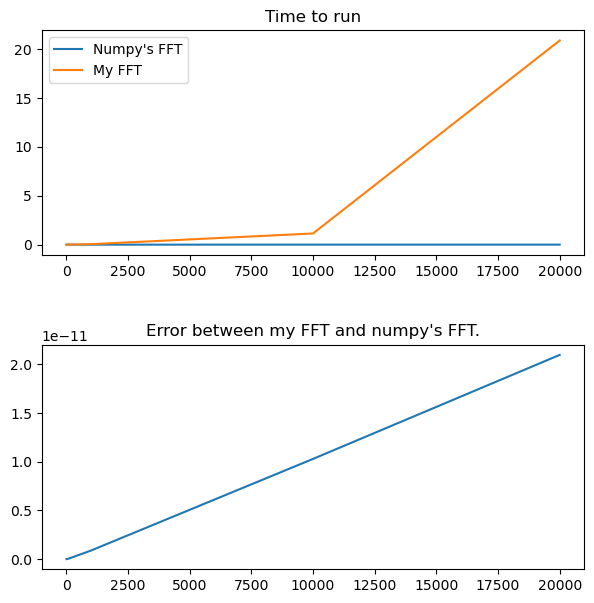

In [114]:
import numpy as np

Prime_Nb = set((2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53,
                59, 61, 67, 71, 73, 79, 83, 89, 97, 101,103,107,109,113,127,131,137,139,149,151,157,163))

def decomp_prime(n: int) -> tuple:
    """
    n is the integer that should be decomposed in prime numbers. For my implementation of the Cooley-Tukey algorithm, I assume the radix is the smallest
    prime number of the decomposition.
    """
    global Prime_Nb
    a = []
    while n != 1:
        for k in Prime_Nb:
            if n % k == 0:
                a += [k]
                n //= k
    return a

def couple(T: list, Output: list[list]) -> tuple[list]:
    """
    This function computes all the existing couples between two elements of the tuple T. It works recursively until only a couple of integer
    remains.
    """
    N = len(T)
    for i in range(N):
        for j in range(i + 1, N):
            A = T.copy()
            A[i] *= A[j]
            A.pop(j)
            if len(A) == 2 and A not in Output:
                Output.append(A)
            if len(A) > 2:
                couple(A, Output)
    return Output

def find_radix(N: int, decomp: np.ndarray = None):
    """
    N (int): Size of the vector to compute the FFT from.
    Take the smallest radix such that the second number of the decomposition is NOT a prime factor.
    """
    if decomp is None:
        #Compute the decompisition of N in prime factors. By assumption, N should not be a prime number.
        T = decomp_prime(N)
    else:
        T=decomp
    
    if len(T) == 2:
        #If only one decomposition
        return T

    #Find all possible couple whose product equal N.
    T = couple(T, [])
    #Put the smallest numbers on the left
    for list_ in T:
        if list_[0] > list_[1]:
            list_[0], list_[1] = list_[1], list_[0]
    T = sorted(T, key=lambda x: x[0])
    return T[0]
    
    ##### Use this snippet of code if you only accept decompositions where 
    # for list_ in T:
    #     if list_[1] not in Prime_Nb:
    #         return list_
    # raise Exception("{} can not be decomposed as a product of integer without prime factor.".format(N))


def fft_power_2(X: np.ndarray, inverse: bool = False) -> np.ndarray:
    """
    Compute the Fourier transform of X, assuming its size is a power of 2.
    inverse: bool. Tells if you want to compute the inverse transform of X.
    """
    N = len(X)
    assert (N & (N - 1)) == 0 and N > 0, "N should be a power of 2."

    inv = -2*inverse + 1
    w = np.exp(-1j*2*np.pi/N*inv)
    if inverse:
        C = 1/N
    else:
        C = 1

    W = np.diag([w**k for k in range(N//2)])

    if N > 4:
        x1, x2 = X[::2], X[1::2]
        X1, X2 = fft_power_2(x1)*C, fft_power_2(x2)*C
        X2 = W @ X2
        return np.concatenate((X1 + X2, X1 - X2), axis = 0)
    elif N == 4:
        T2 = np.array([[1, 1], [1, -1]])
        x1, x2 = X[::2]*C, X[1::2]*C
        X1 = T2 @ x1
        X2 =  W @ T2 @ x2
        return np.concatenate((X1 + X2, X1 - X2), axis = 0)
    else:
        raise Exception("You shouldn't end up here bro.")

def DFT(X: np.ndarray, inverse: bool = False):
    fft_X = np.empty((len(X)), dtype="complex")
    inv, C = -2*inverse + 1, 1
    if inverse:
        C = 1/len(X)
    for i in range(len(X)):
        fft_X[i] = sum(np.exp(-2*np.pi*1j*i*np.array(range(len(X)))/len(X)*inv)*X)*C
    return fft_X

def fft(X: np.ndarray, inverse: bool = False, padd: bool= False) -> np.ndarray:

    if isinstance(X, list):
        X = np.array(X, dtype="complex")

    assert isinstance(X, np.ndarray), "X should be a numpy array"
    N = len(X)

    if (N & (N-1) == 0): #Check the size of the vector is a power of 2.
        return fft_power_2(X, inverse=inverse)
    elif padd:
        n = np.floor(np.log2(N)).astype(int)
        M = n<<1 - N #Number of entries to pad
        padding = np.zeros((M, *X.shape[1:]))
        X = np.concatenate((X, padding), axis=0)
        return fft_power_2(X, inverse=inverse)

    if N==3:
        return DFT(X, inverse=inverse)

    decomp = decomp_prime(N)

    if len(decomp) == 1:
        #Then N is a prime number
        fft_X = Rader_fft(X)
    elif len(decomp) > 1:
        radix, non_radix = find_radix(N, decomp)

        # if non_radix in Prime_Nb:
        #     raise ValueError("The list length should not be a prime number.")

        hat_fft_X = np.empty((radix, non_radix), dtype="complex")
        inv=-2*inverse + 1

        #Make radix FFTs of size non_radix, i.e., the inner loop.
        for i in range(radix):
            X_tmp = X[i::radix] #Should contain non_radix entries
            hat_fft_X[i] = fft(X_tmp, inverse)*np.exp(-2*np.pi*1j*np.array(range(non_radix))*i/N*inv)

        fft_X = np.empty((radix, non_radix), dtype='complex')
        # Make non_radix DFTs of size radix, i.e., the outer loop.
        for j in range(non_radix):
            fft_X[:,j] = DFT(hat_fft_X[:,j], inverse=inverse)
        fft_X = fft_X.flatten()
    return fft_X

def ifft(X: np.ndarray) -> np.ndarray:
    return fft(X, inverse=True)

def Rader_fft(X: np.ndarray, inverse: bool=False):
    N=len(X)
    assert len(decomp_prime(N)) >= 1, "N is not a prime number. Do not apply Rader's algorithm."
    fft_X = np.empty(*X.shape, dtype="complex")
    fft_X[0] = np.sum(X, axis=0)
    inv=-2*inverse + 1
    def find_generator(N: int):
        """
        Find a generator in the cyclic multiplicative group composed of the N-1 first integer.
        """
        primes = decomp_prime(N-1)
        for g in np.arange(1, N):
            result=True
            for prime in primes:
                if np.power(g, (N-1)//prime) % N == 1:
                    result=False
                    break
            if result:
                return g

    generator = find_generator(N)
    list_gen = np.array([np.power(generator, n)%N for n in range(N-1)])
    w = np.exp(-2*1j*inv*np.pi*list_gen/N, dtype="complex")[::-1] #Take the reverse order

    X_trunc = X[list_gen] #Re-order X

    # Compute fft
    fft_w = fft(w, inverse=inverse)
    fft_X_trunc = fft(X_trunc, inverse=inverse)
    
        
    tmp = X[0] + fft(fft_X_trunc*fft_w, inverse=(not inverse)) #Not finished, it should be re-ordered.

    list_gen_inv = np.empty(N-1, dtype="int")
    list_gen_reverse = np.flip(list_gen, axis=0)
    for i in range(N-1):
        list_gen_inv[list_gen_reverse[i] - 1] = i
    fft_X[1:] = tmp[list_gen_inv]
    return fft_X

if __name__=='__main__':
    N = [10, 100, 1000, 10000, 20000]
    error = []
    time_fft = []
    time_numpy_fft = []
    import time
    for n in N:
        X = np.random.randn(n)
        t_start = time.time()
        fft_X = fft(X, inverse=False)
        t_end = time.time()
        numpy_fft_X = np.fft.fft(X)
        t_end2 = time.time()
        time_numpy_fft.append(t_end2 - t_end)
        time_fft.append(t_end - t_start)
        error.append(np.linalg.norm(fft_X - numpy_fft_X))
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
    fig.subplots_adjust(wspace=2, hspace=.4)
    axes[0].plot(N, time_numpy_fft, label="Numpy's FFT")
    axes[0].plot(N, time_fft, label = "My FFT")
    axes[1].plot(N, error)
    axes[0].legend()
    axes[0].set_title("Time to run")
    axes[1].set_title("Error between my FFT and numpy's FFT.")
    plt.show()